Display the daily revenue data

In [6]:
import pandas as pd
payment = pd.read_csv(r"C:\Users\swazy\Downloads\Documents\payment1.csv")
payment["Trading Day"] = pd.to_datetime(payment["Trading Day"], errors= 'coerce')
daily_revenue = payment.groupby('Trading Day')['Total'].sum().reset_index()
daily_revenue

,Trading Day,Total
0,2024-09-01,5184.88
1,2024-09-02,2790.39
2,2024-09-03,1706.19
3,2024-09-04,2757.28
4,2024-09-05,3695.17
5,2024-09-06,3683.85
6,2024-09-07,3879.12
7,2024-09-08,4910.67
8,2024-09-09,2343.17
9,2024-09-10,6117.08


Line Plot: Daily Revenue Trend

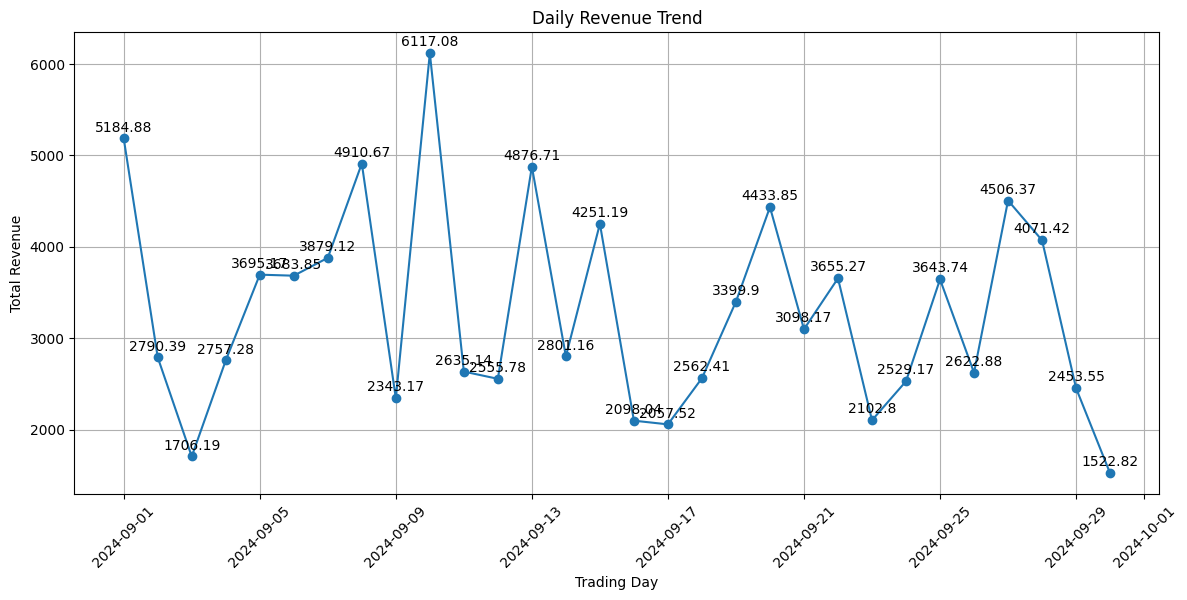

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(daily_revenue['Trading Day'], daily_revenue['Total'], marker='o')
plt.title('Daily Revenue Trend')
plt.xlabel('Trading Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()


for i, txt in enumerate(daily_revenue['Total']):
    plt.annotate(txt,(daily_revenue['Trading Day'][i],daily_revenue['Total'][i]),
                 textcoords = "offset points", xytext=(0,5), ha = 'center')

plt.show()

Bar Chart: Revenue by Day

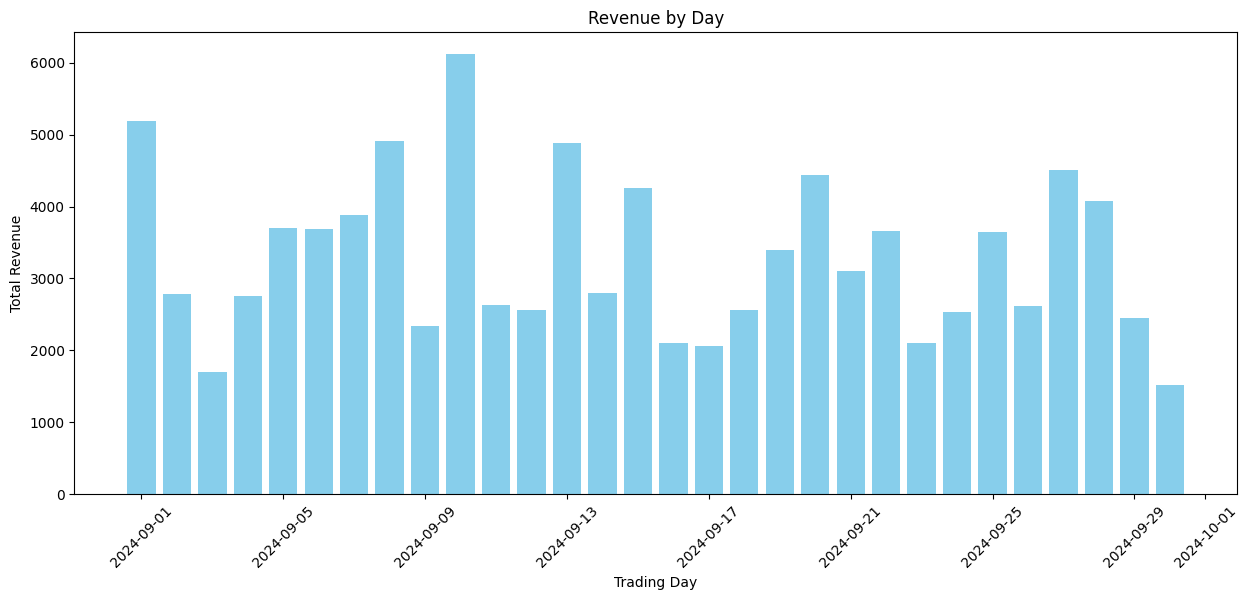

In [66]:
plt.figure(figsize=(15, 6))
plt.bar(daily_revenue['Trading Day'], daily_revenue['Total'], color='skyblue')
plt.title('Revenue by Day')
plt.xlabel('Trading Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Adding labels on top of each bar

plt.show()

Area Plot: Cumulative Revenue Over Time

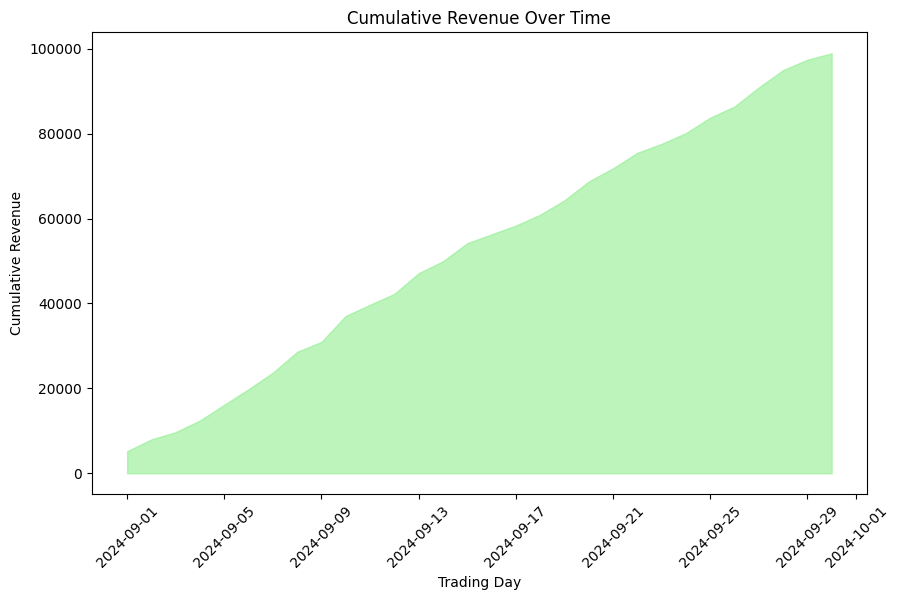

In [13]:
# Calculating cumulative revenue
daily_revenue['Cumulative Revenue'] = daily_revenue['Total'].cumsum()

# Plotting an area chart for cumulative revenue
plt.figure(figsize=(10, 6))
plt.fill_between(daily_revenue['Trading Day'], daily_revenue['Cumulative Revenue'], color='lightgreen', alpha=0.6)
plt.title('Cumulative Revenue Over Time')
plt.xlabel('Trading Day')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=45)
plt.show()

Scatter Plot: Revenue per Day with Markers

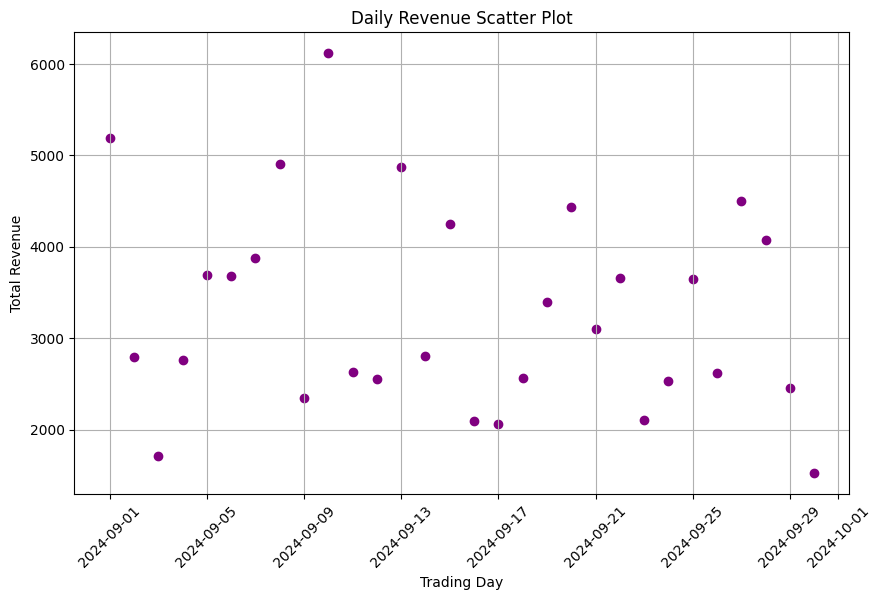

In [15]:
# Plotting a scatter chart for daily revenue
plt.figure(figsize=(10, 6))
plt.scatter(daily_revenue['Trading Day'], daily_revenue['Total'], color='purple')
plt.title('Daily Revenue Scatter Plot')
plt.xlabel('Trading Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Analyzing the Payment Method Distribution

In [20]:
payment_method_counts = payment['Tender'].value_counts().reset_index()
payment_method_counts.columns = ['Payment Method', 'Transaction Count']

payment_method_counts

,Payment Method,Transaction Count
0,Credit,2496


Analyzing Total Revenue by Payment Method

In [22]:
payment_method_revenue = payment.groupby('Tender')['Total'].sum().reset_index()
payment_method_revenue.columns = ['Payment Method', 'Total Revenue']

payment_method_revenue

,Payment Method,Total Revenue
0,Credit,98945.69


Visualization of Payment Method Analysis

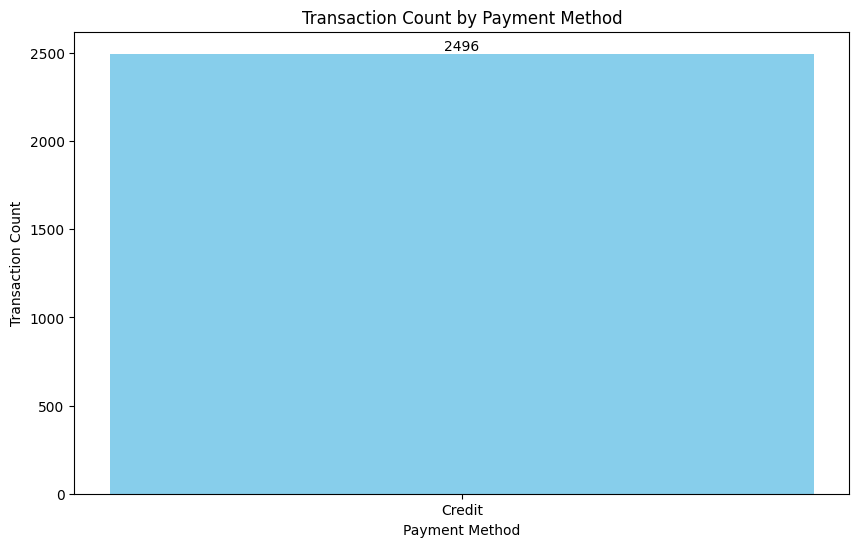

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(payment_method_counts['Payment Method'], payment_method_counts['Transaction Count'], color='skyblue')
plt.title('Transaction Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')

for i, txt in enumerate(payment_method_counts['Transaction Count']):
    plt.text(i, txt, f'{txt}', ha='center', va='bottom')

plt.show()



Bar Chart for Revenue by Payment Method:

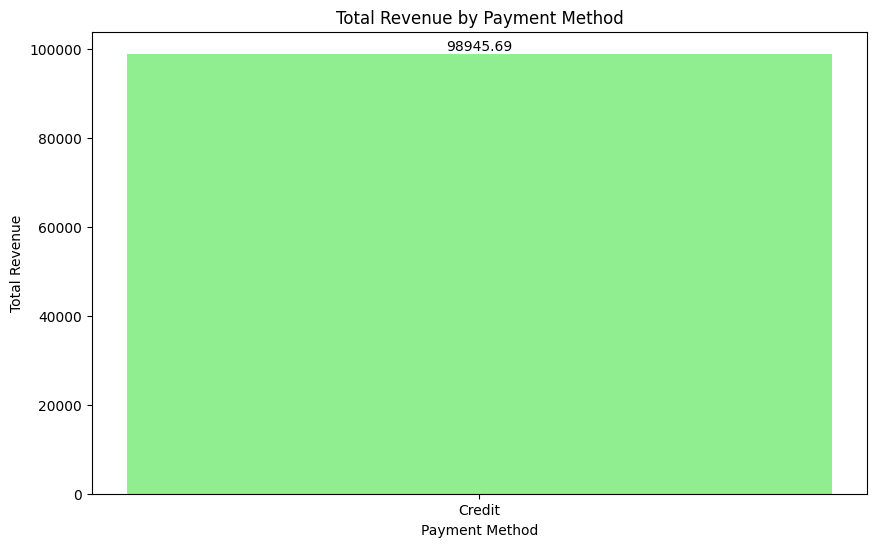

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(payment_method_revenue['Payment Method'], payment_method_revenue['Total Revenue'], color='lightgreen')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')

# Adding labels
for i, txt in enumerate(payment_method_revenue['Total Revenue']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom')

plt.show()

Calculate the Average Tip by Payment Method

In [33]:
tip_by_payment_method = payment.groupby('Tender')['Tip'].mean().reset_index()
tip_by_payment_method.columns = ['Payment Method', 'Average Tip']

tip_by_payment_method

,Payment Method,Average Tip
0,Credit,7.944135


Calculate the Average Tip by Server

In [34]:
tip_by_server = payment.groupby('Server')['Tip'].mean().reset_index()
tip_by_server.columns = ['Server', 'Average Tip']

tip_by_server

,Server,Average Tip
0,AM BAR,7.356585
1,Arleth Perez,5.638077
2,Chantalle Reyes,8.131021
3,GHOST SERVER,11.333333
4,Harold Thompkins,0.000000
5,Krystal Rabago,8.025473
6,PM BAR,8.188327


Calculate Total Tip as a Percentage of Payment

In [35]:

payment['Tip Percentage'] = (payment['Tip'] / payment['Payment']) * 100


tip_percentage_by_payment_method = payment.groupby('Tender')['Tip Percentage'].mean().reset_index()
tip_percentage_by_payment_method.columns = ['Payment Method', 'Average Tip Percentage']

tip_percentage_by_payment_method


,Payment Method,Average Tip Percentage
0,Credit,45.143159


In [36]:
payment['Tip Percentage'] = (payment['Tip'] / payment['Payment']) * 100
tip_percentage_by_payment_method = payment.groupby('Tender')['Tip Percentage'].mean().reset_index()
tip_percentage_by_payment_method.columns = ['Payment Method', 'Average Tip Percentage']

tip_percentage_by_payment_method

,Payment Method,Average Tip Percentage
0,Credit,45.143159


Visualizations for Tip Analysis

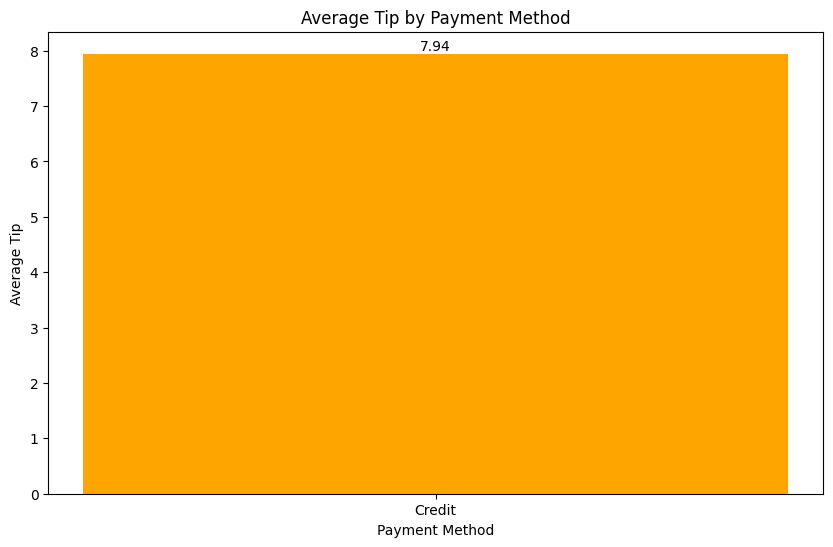

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(tip_by_payment_method['Payment Method'], tip_by_payment_method['Average Tip'], color='orange')
plt.title('Average Tip by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Tip')

# Adding labels
for i, txt in enumerate(tip_by_payment_method['Average Tip']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom')

plt.show()

Bar Chart for Average Tip by Server

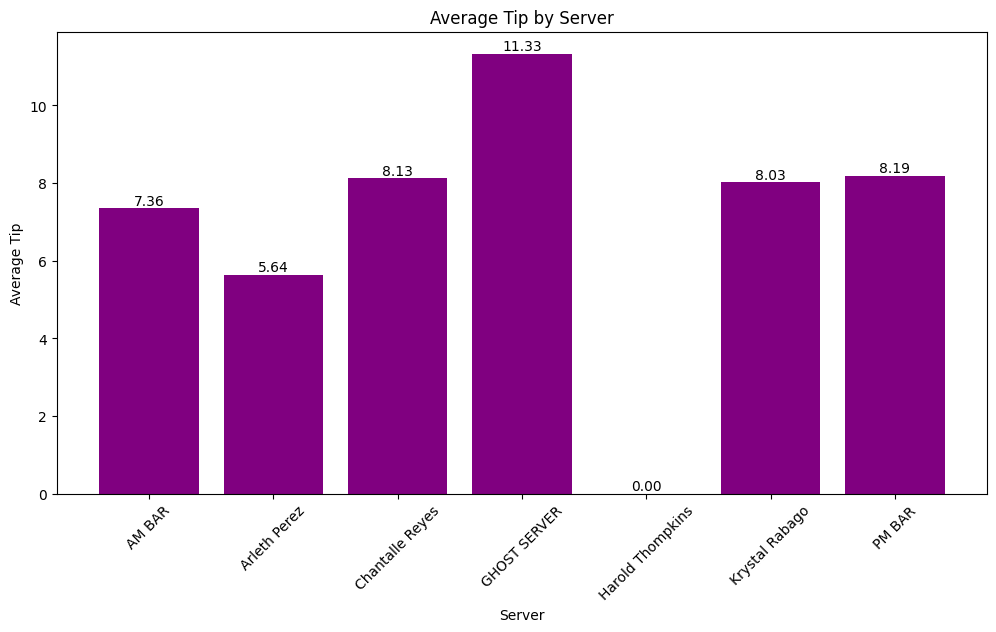

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(tip_by_server['Server'], tip_by_server['Average Tip'], color='purple')
plt.title('Average Tip by Server')
plt.xlabel('Server')
plt.ylabel('Average Tip')
plt.xticks(rotation=45)

# Adding labels
for i, txt in enumerate(tip_by_server['Average Tip']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom')

plt.show()

Bar Chart for Average Tip Percentage by Payment Method

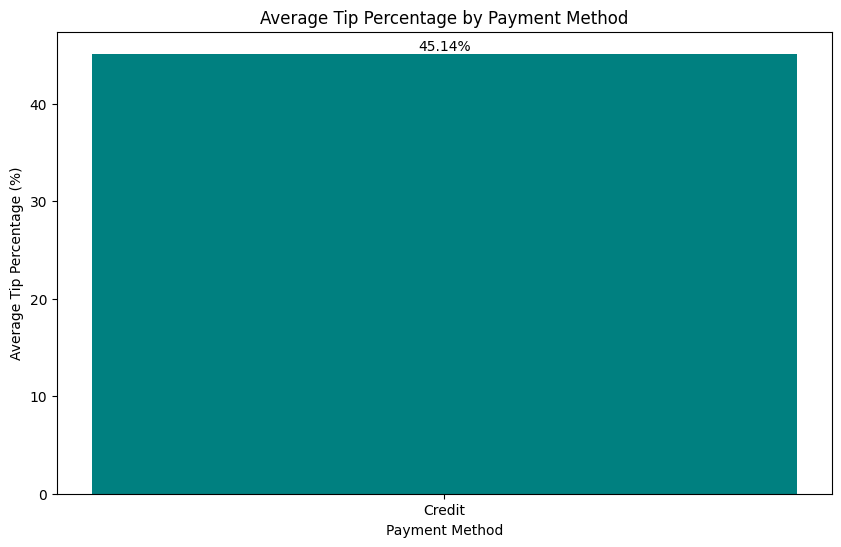

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(tip_percentage_by_payment_method['Payment Method'], tip_percentage_by_payment_method['Average Tip Percentage'], color='teal')
plt.title('Average Tip Percentage by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Tip Percentage (%)')

# Adding labels
for i, txt in enumerate(tip_percentage_by_payment_method['Average Tip Percentage']):
    plt.text(i, txt, f'{txt:.2f}%', ha='center', va='bottom')

plt.show()

Calculate Total Sales and Total Tips by Server

In [41]:
server_performance = payment.groupby('Server').agg({
    'Total': 'sum',
    'Tip': 'sum'
}).reset_index()
server_performance.columns = ['Server', 'Total Sales', 'Total Tips']

server_performance

,Server,Total Sales,Total Tips
0,AM BAR,24665.68,4524.30
1,Arleth Perez,977.91,146.59
2,Chantalle Reyes,11245.81,1910.79
3,GHOST SERVER,693.22,136.00
4,Harold Thompkins,17.32,0.00
5,Krystal Rabago,12617.43,1950.19
6,PM BAR,48728.32,11160.69


Calculate Average Tip per Transaction by Server

In [42]:
server_performance['Average Tip'] = payment.groupby('Server')['Tip'].mean().values

server_performance

,Server,Total Sales,Total Tips,Average Tip
0,AM BAR,24665.68,4524.30,7.356585
1,Arleth Perez,977.91,146.59,5.638077
2,Chantalle Reyes,11245.81,1910.79,8.131021
3,GHOST SERVER,693.22,136.00,11.333333
4,Harold Thompkins,17.32,0.00,0.000000
5,Krystal Rabago,12617.43,1950.19,8.025473
6,PM BAR,48728.32,11160.69,8.188327


Visualizations for Server Performance

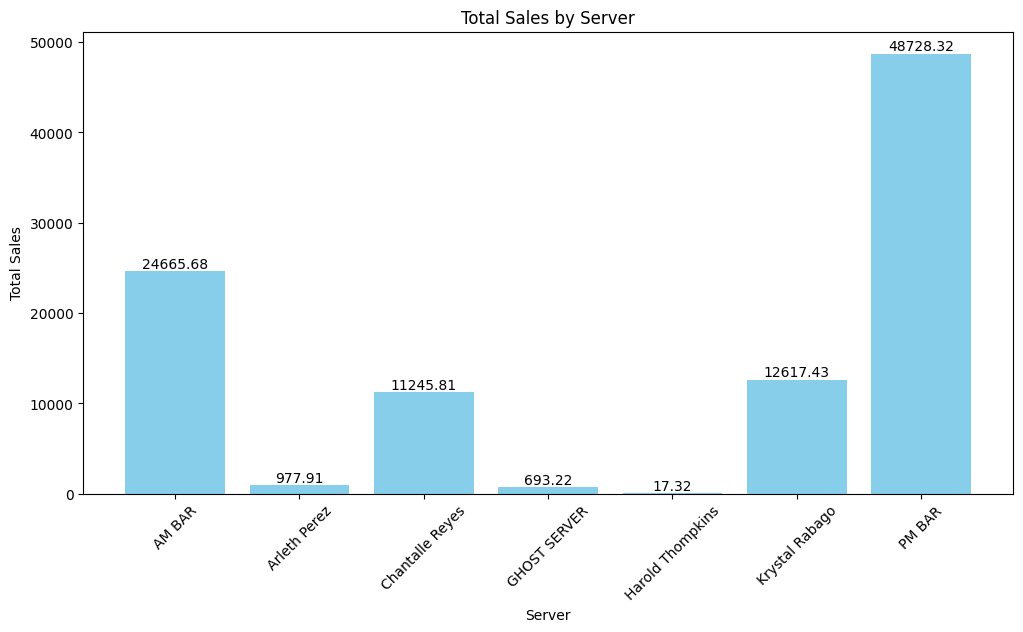

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(server_performance['Server'], server_performance['Total Sales'], color='skyblue')
plt.title('Total Sales by Server')
plt.xlabel('Server')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Adding labels
for i, txt in enumerate(server_performance['Total Sales']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom')

plt.show()

Bar Chart for Total Tips by Server

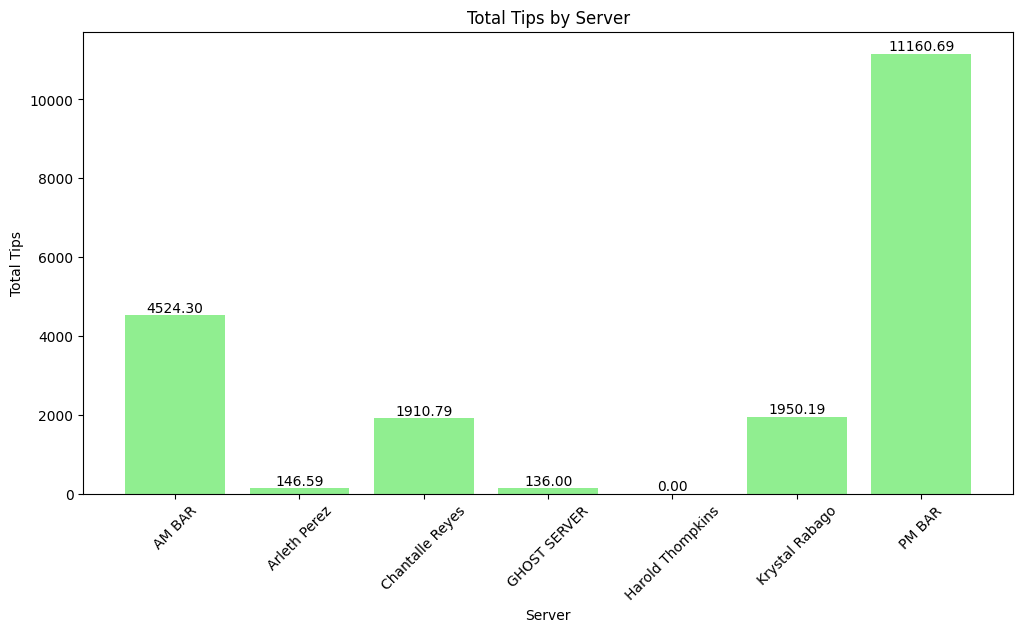

In [44]:
plt.figure(figsize=(12, 6))
plt.bar(server_performance['Server'], server_performance['Total Tips'], color='lightgreen')
plt.title('Total Tips by Server')
plt.xlabel('Server')
plt.ylabel('Total Tips')
plt.xticks(rotation=45)

# Adding labels
for i, txt in enumerate(server_performance['Total Tips']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom')

plt.show()

Bar Chart for Average Tip by Server

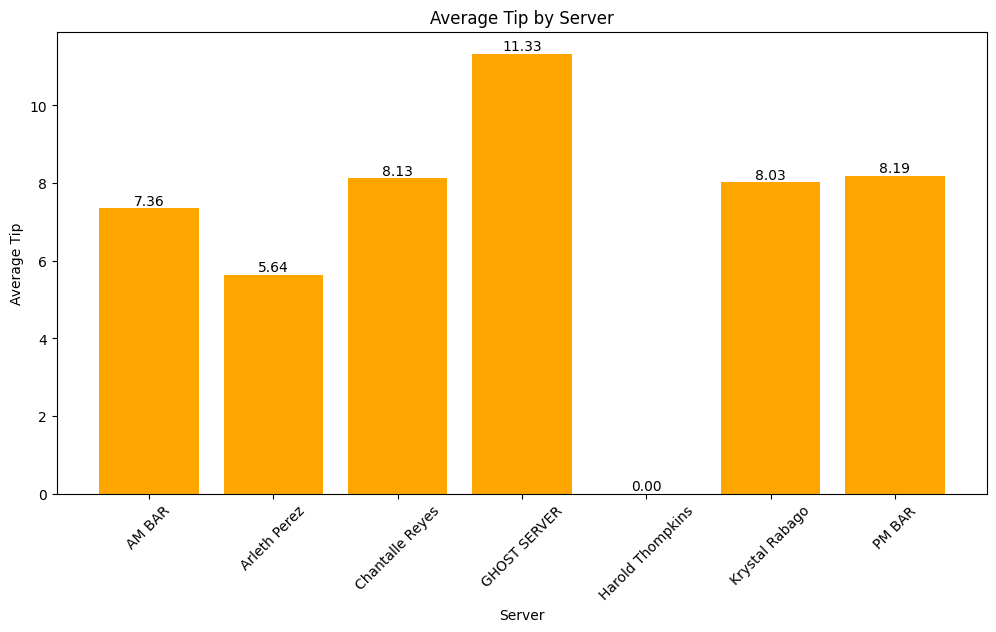

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(server_performance['Server'], server_performance['Average Tip'], color='orange')
plt.title('Average Tip by Server')
plt.xlabel('Server')
plt.ylabel('Average Tip')
plt.xticks(rotation=45)

# Adding labels
for i, txt in enumerate(server_performance['Average Tip']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom')

plt.show()

Calculate the Number of Transactions by Day

In [47]:
# Number of transactions per day
transactions_by_day = payment.groupby('Trading Day').size().reset_index(name='Transaction Count')

transactions_by_day

,Trading Day,Transaction Count
0,2024-09-01,128
1,2024-09-02,90
2,2024-09-03,47
3,2024-09-04,87
4,2024-09-05,95
5,2024-09-06,105
6,2024-09-07,89
7,2024-09-08,103
8,2024-09-09,64
9,2024-09-10,71


Calculate the Number of Transactions by Hour

In [48]:
# Convert 'Date' column to datetime if it isn't already
payment['Date'] = pd.to_datetime(payment['Date'], errors='coerce')

# Extract hour from the 'Date' column
payment['Hour'] = payment['Date'].dt.hour

# Number of transactions per hour
transactions_by_hour = payment.groupby('Hour').size().reset_index(name='Transaction Count')

transactions_by_hour

,Hour,Transaction Count
0,0.0,226
1,1.0,269
2,2.0,47
3,11.0,12
4,12.0,64
5,13.0,92
6,14.0,84
7,15.0,85
8,16.0,81
9,17.0,133


Visualizations for Transaction Trends

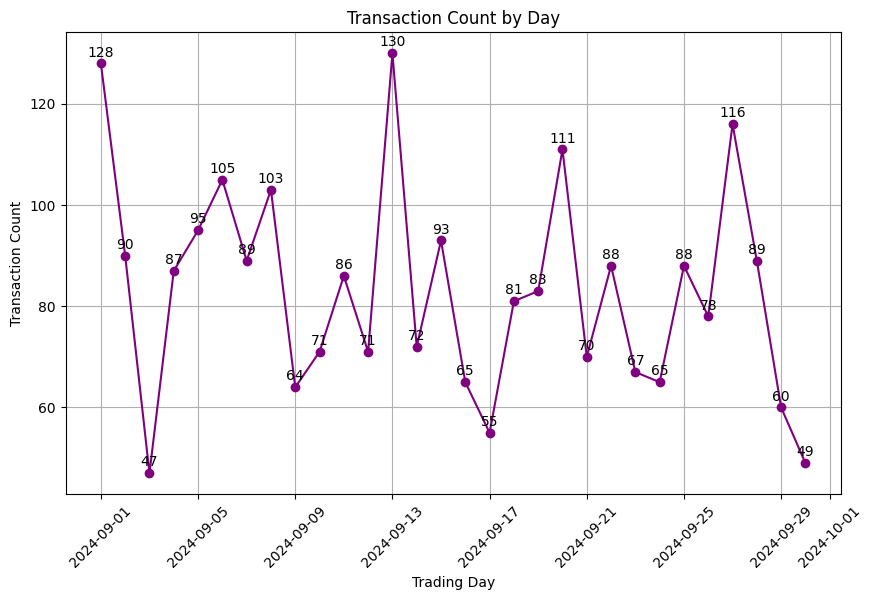

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_day['Trading Day'], transactions_by_day['Transaction Count'], marker='o', color='purple')
plt.title('Transaction Count by Day')
plt.xlabel('Trading Day')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid()

# Adding labels
for i, txt in enumerate(transactions_by_day['Transaction Count']):
    plt.annotate(txt, (transactions_by_day['Trading Day'][i], transactions_by_day['Transaction Count'][i]), 
                 textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

Bar Chart for Transactions by Hour

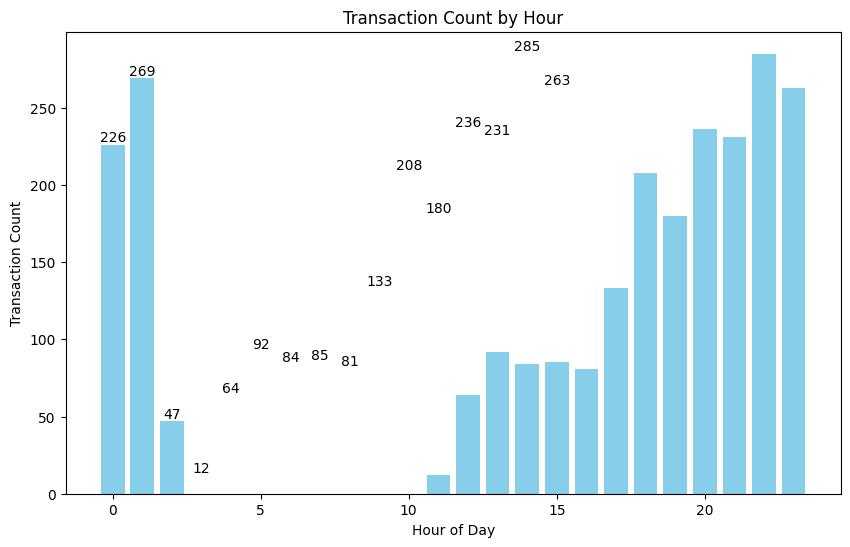

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_hour['Hour'], transactions_by_hour['Transaction Count'], color='skyblue')
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')

# Adding labels
for i, txt in enumerate(transactions_by_hour['Transaction Count']):
    plt.text(i, txt, f'{txt}', ha='center', va='bottom')

plt.show()